Import potrebnih knjižnic:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.1 Izbor podatkov

| Ime spremenljivke | Pomen / opis | Tip podatka |
|---|---|---|
| customerID | Enolična identifikacijska oznaka posamezne stranke. | Kategorna (ID string) |
| gender | Spol stranke (Male ali Female). | Kategorna (nominalna) |
| SeniorCitizen | Označuje, ali je stranka starejša oseba (1 = da, 0 = ne). | Numerična (binarna, lahko tudi kategorialna) |
| Partner | Ali ima stranka partnerja (Yes / No). | Kategorna (nominalna) |
| Dependents | Ali ima stranka odvisne člane (otroke, družinske člane) (Yes / No). | Kategorna (nominalna) |
| tenure | Število mesecev, kolikor je stranka naročena pri podjetju. | Numerična (diskretna) |
| PhoneService | Ali stranka uporablja telefonske storitve (Yes / No). | Kategorna (nominalna) |
| MultipleLines | Ali ima stranka več telefonskih linij (Yes, No, No phone service). | Kategorna (nominalna) |
| InternetService | Vrsta internetne storitve (DSL, Fiber optic, No). | Kategorna (nominalna) |
| OnlineSecurity | Dodatna storitev spletne varnosti (Yes, No, No internet service). | Kategorna (nominalna) |
| OnlineBackup | Storitve spletne varnostne kopije (Yes, No, No internet service). | Kategorna (nominalna) |
| DeviceProtection | Zaščita naprav (Yes, No, No internet service). | Kategorna (nominalna) |
| TechSupport | Tehnična podpora (Yes, No, No internet service). | Kategorna (nominalna) |
| StreamingTV | Storitve spletnega televizijskega pretakanja (Yes, No, No internet service). | Kategorna (nominalna) |
| StreamingMovies | Storitve spletnega pretakanja filmov (Yes, No, No internet service). | Kategorna (nominalna) |
| Contract | Vrsta pogodbe: Month-to-month, One year, Two year. | Kategorna (ordinalna) |
| PaperlessBilling | Ali stranka uporablja brezpapirno obračunavanje (Yes / No). | Kategorna (nominalna) |
| PaymentMethod | Način plačila (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)). | Kategorna (nominalna) |
| MonthlyCharges | Mesečni strošek naročnine (v USD). | Numerična (kontinuirna) |
| TotalCharges | Skupni strošek, ki ga je plačala stranka do danes. | Numerična (kontinuirna) |
| Churn | Ali je stranka prekinila naročnino (Yes / No). | Ciljna spremenljivka, kategorialna (binarna) |

# 1.2 Pregled in čiščenje podatkov

In [ ]:
df = pd.read_csv("Telco-Customer-Churn.csv")

print(df.info())
print(df.head())
print(df.describe(include="all"))

missing = df.isna().sum()
print("Manjkajoče vrednosti:\n", missing)

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df.loc[df["tenure"] == 0, "TotalCharges"] = 0

df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "No", 1: "Yes"})

print("Manjkajoče po pretvorbi:\n", df.isna().sum())

for col in df.columns:
    if df[col].dtype in ["float64", "int64"]:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

duplicates = df.duplicated().sum()
print("Število podvojenih vrstic:", duplicates)

df = df.drop_duplicates()

numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col} – število ekstremnih vrednosti: {outliers}")

    df[col] = np.clip(df[col], lower, upper)

print(df.info())
print(df.describe())

df.to_csv("Telco-Customer-Churn-Cleaned.csv", index=False)


Pri spremenljivki TotalCharges so bile zaznane manjkajoče vrednosti, ki se pojavljajo izključno pri strankah z ničelno dobo trajanja naročniškega razmerja (tenure = 0). Ker te stranke še niso imele obračunanih stroškov, so bile manjkajoče vrednosti nadomeščene z vrednostjo 0, kar ohranja semantično pravilnost podatkov in preprečuje umetno zviševanje skupnih stroškov.

Spremenljivka SeniorCitizen je bila pretvorjena iz binarne oblike (0/1) v nominalno (Yes/No) zaradi boljše berljivosti in interpretacije pri opisni analizi.

# 1.3 Deskriptivna statistika z grafi

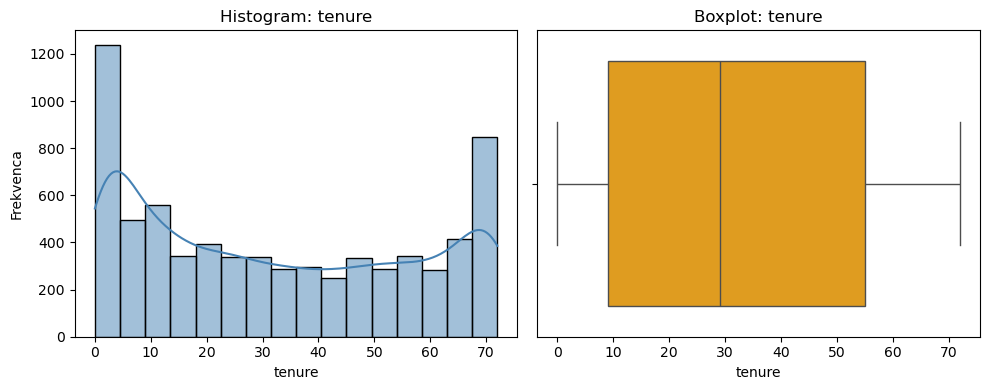

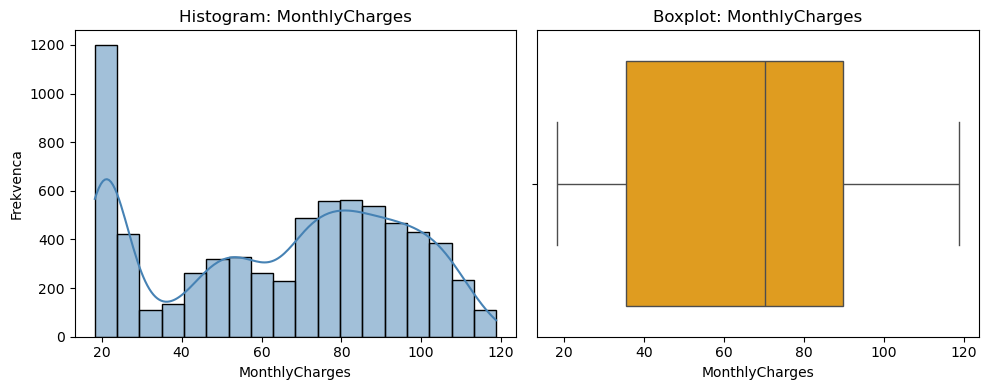

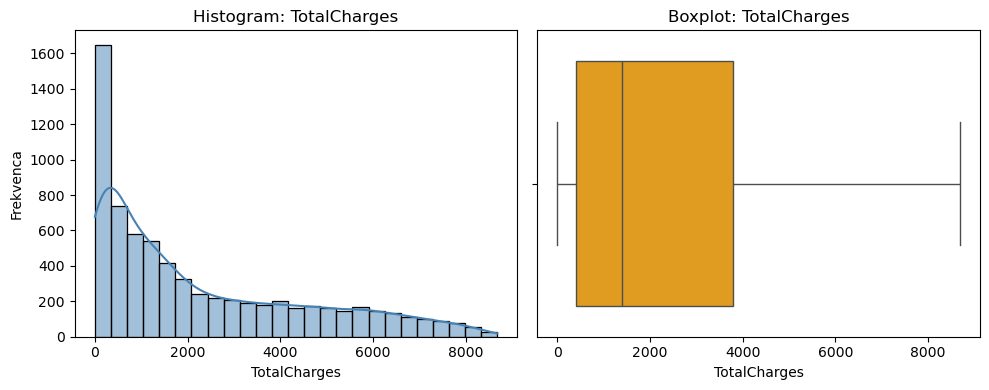

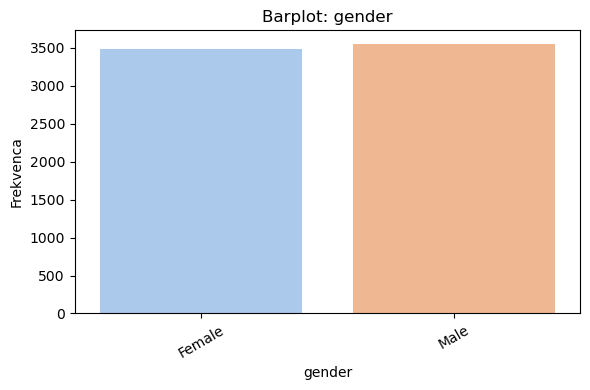

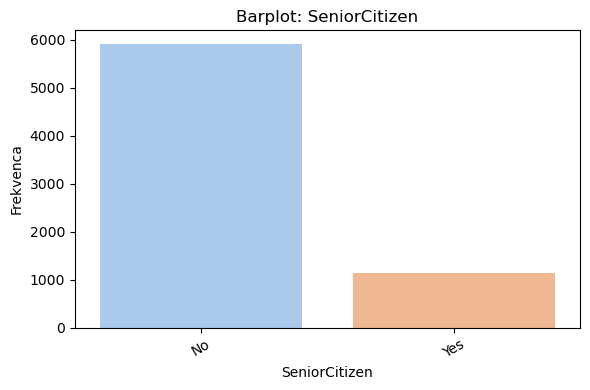

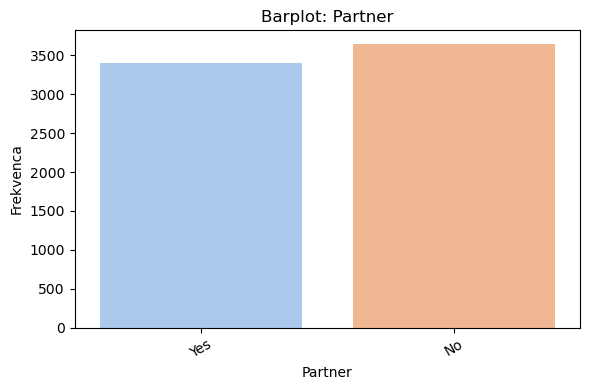

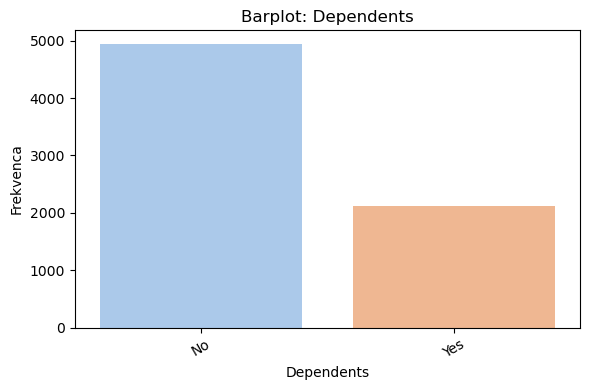

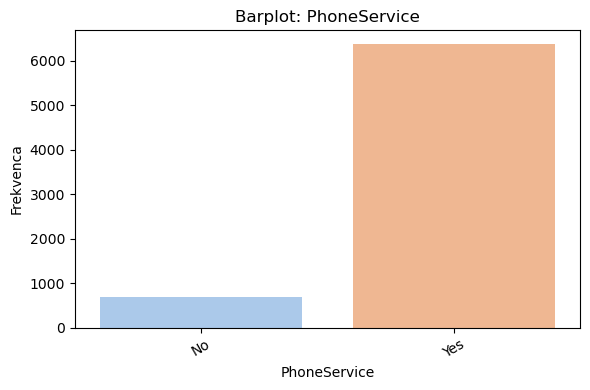

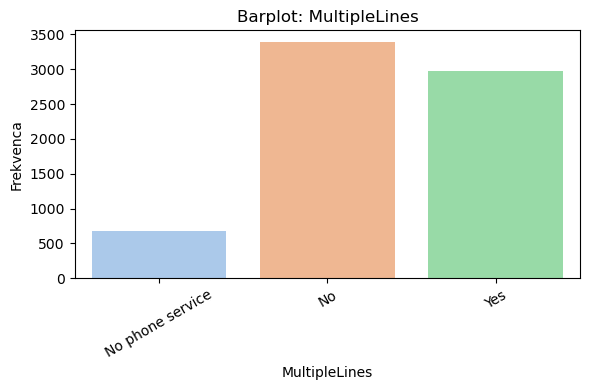

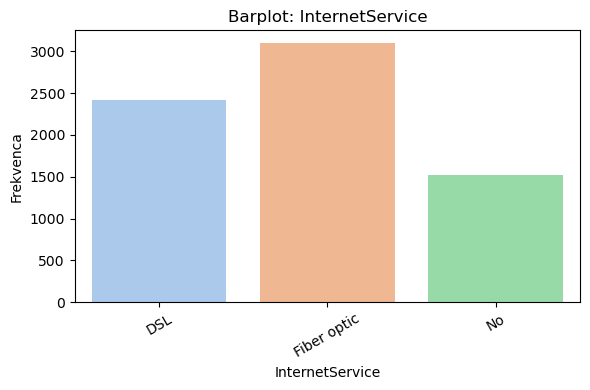

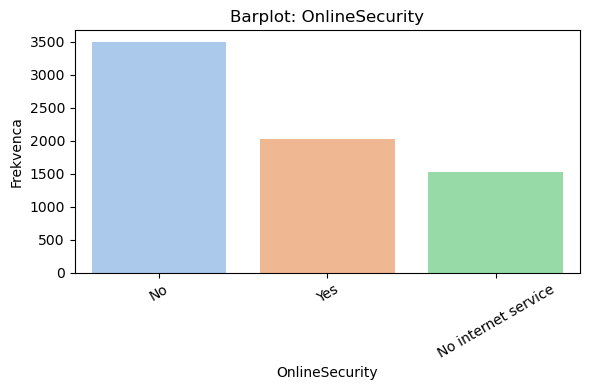

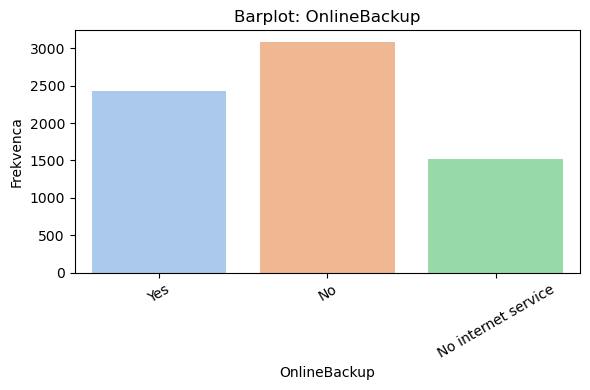

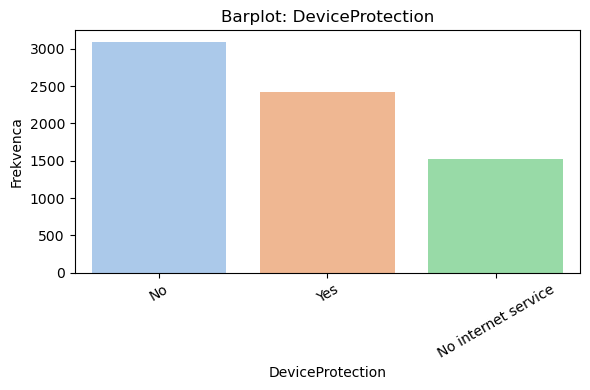

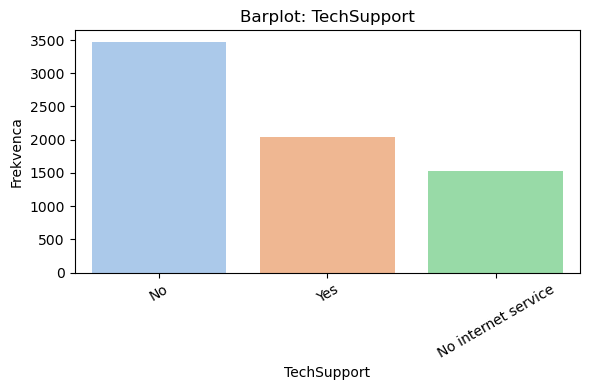

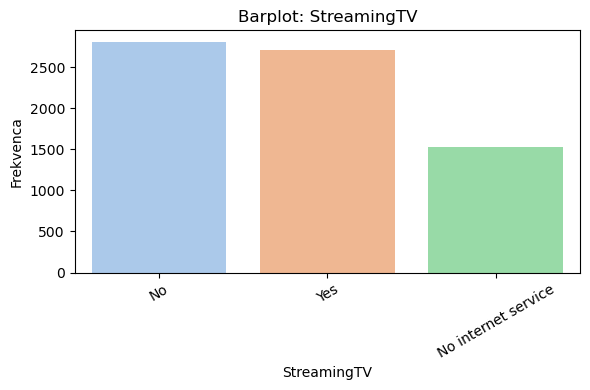

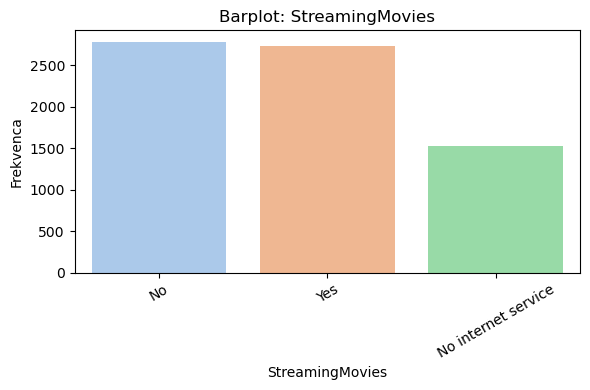

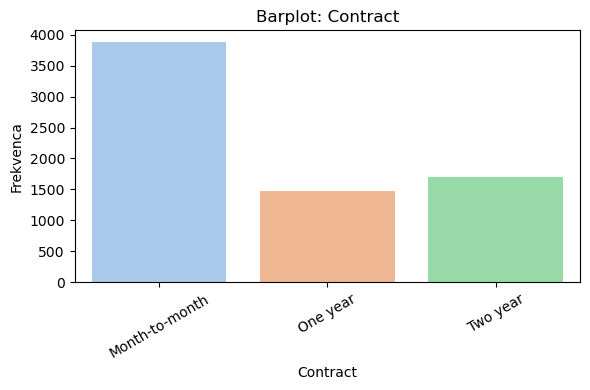

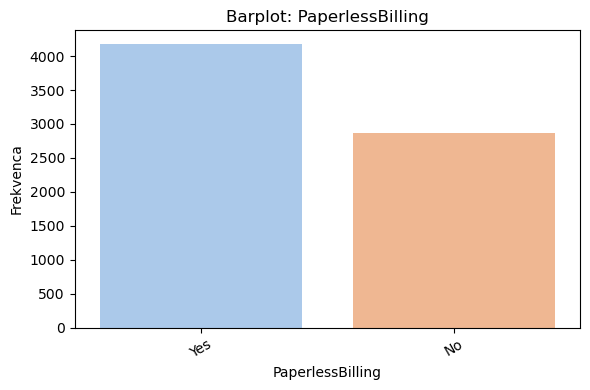

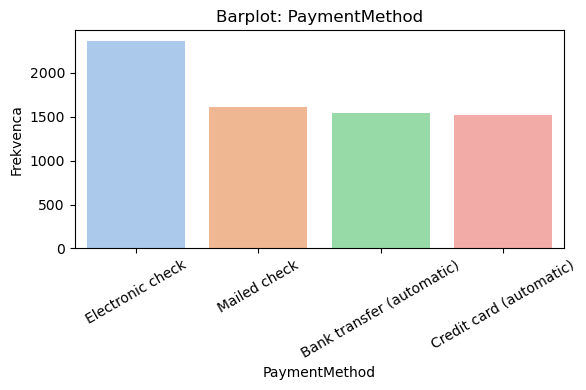

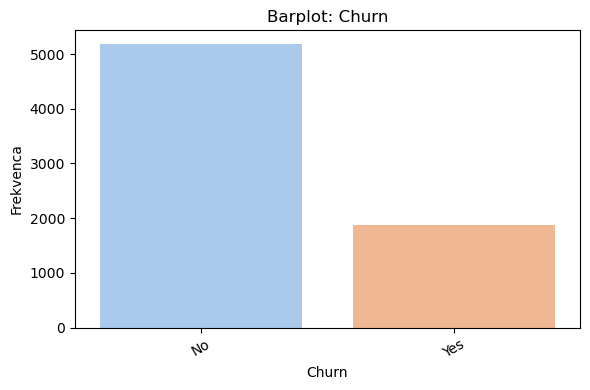


Numerične spremenljivke:


,Mean ± SD,Median (Q1–Q3),Min–Max
tenure,32.371 ± 24.559,29.0 (9.0–55.0),0.0–72.0
MonthlyCharges,64.762 ± 30.09,70.35 (35.5–89.85),18.25–118.75
TotalCharges,2279.734 ± 2266.794,1394.55 (398.55–3786.6),0.0–8684.8



Kategorialne spremenljivke (n in %):


,Spremenljivka,Kategorija,Število,%
0,gender,Male,3555,50.5
1,gender,Female,3488,49.5
2,SeniorCitizen,No,5901,83.8
3,SeniorCitizen,Yes,1142,16.2
4,Partner,No,3641,51.7
5,Partner,Yes,3402,48.3
6,Dependents,No,4933,70.0
7,Dependents,Yes,2110,30.0
8,PhoneService,Yes,6361,90.3
9,PhoneService,No,682,9.7


In [5]:
df = pd.read_csv("Telco-Customer-Churn-Cleaned.csv")

# ID stranke ne potrebujemo za analizo
customer_ids = df["customerID"]  
df = df.drop(columns=["customerID"]) 

# Ločimo numerične in kategorialne spremenljivke
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

num_stats = df[num_cols].describe().T
num_stats["median"] = df[num_cols].median()
num_stats["Q1"] = df[num_cols].quantile(0.25)
num_stats["Q3"] = df[num_cols].quantile(0.75)

num_stats = num_stats.round(3)

num_stats["Mean ± SD"] = (
    num_stats["mean"].astype(str) + " ± " + num_stats["std"].astype(str)
)
num_stats["Median (Q1–Q3)"] = (
    num_stats["median"].astype(str)
    + " ("
    + num_stats["Q1"].astype(str)
    + "–"
    + num_stats["Q3"].astype(str)
    + ")"
)
num_stats["Min–Max"] = (
    num_stats["min"].astype(str) + "–" + num_stats["max"].astype(str)
)

summary_table = num_stats[["Mean ± SD", "Median (Q1–Q3)", "Min–Max"]]

# Kategorialne spremenljivke (n in %)
cat_stats = (
    df[cat_cols]
    .apply(lambda x: x.value_counts())
    .fillna(0)
    .astype(int)
)
cat_percent = df[cat_cols].apply(lambda x: x.value_counts(normalize=True) * 100).fillna(0)
cat_summary = cat_stats.astype(str) + " (" + cat_percent.round(1).astype(str) + "%)"

# Numerične
for col in num_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color="steelblue")
    plt.ylabel("Frekvenca")
    plt.title(f"Histogram: {col}")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color="orange")
    plt.title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()

# Kategorialne
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue=col, palette="pastel", legend=False)
    plt.ylabel("Frekvenca")
    plt.title(f"Barplot: {col}")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

print("\nNumerične spremenljivke:")
summary_table = num_stats[["Mean ± SD", "Median (Q1–Q3)", "Min–Max"]]
display(summary_table)

print("\nKategorialne spremenljivke (n in %):")
cat_summary_list = []
for col in cat_cols:
    counts = df[col].value_counts(dropna=False)
    percents = df[col].value_counts(normalize=True, dropna=False) * 100
    temp_df = pd.DataFrame({
        "Spremenljivka": col,
        "Kategorija": counts.index,
        "Število": counts.values,
        "%": percents.round(1).values
    })
    cat_summary_list.append(temp_df)

cat_summary_table = pd.concat(cat_summary_list, ignore_index=True)
display(cat_summary_table)

---

## Uporaba storitev:

- **PhoneService** uporablja kar 90,3 % uporabnikov, kar potrjuje, da gre večinoma za vrste naročnin, kjer je telefon osnovna storitev.

- **MultipleLines** imajo le 42,2 % uporabnikov, 48,1 % jih ima enojno linijo, pojav "No phone service" (9,7 %) ustreza tistim brez telefonske storitve.

- **InternetService**: najpogostejši tip je Fiber optic (44 %), sledi DSL (34,4 %), nato No internet (21,7 %).

→ Že tu se nakazuje segmentacija uporabnikov, kjer najdražje storitve (Fiber optic) lahko vplivajo na večjo verjetnost "Churn".

---

## Dodatne storitve:

- **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies**: vsi ti imajo podobne vzorce — približno 40–50 % uporabnikov nima teh dodatkov, okoli 30–35 % jih ima, preostanek (21,7 %) pa jih nima interneta.

→ To kaže, da mnogi uporabniki niso izbrali dodatkov, kar lahko pomeni nižjo zvestobo ali nižje plačilne pakete.

---

## Pogodba in plačilo:

- **Contract**: več kot polovica (55 %) ima Month-to-month (mesečno podaljševanje), kar pomeni večjo fleksibilnost odpovedi. Le 21 % ima One year in 24 % Two year pogodbe — ti bodo običajno bolj zvesti, manjša verjetnost "Churn".

- **PaperlessBilling**: večina (59,2 %) ima e-račune, kar je verjetno povezano z bolj digitalno usmerjenimi uporabniki.

- **PaymentMethod**: največ uporabnikov (33,6 %) uporablja Electronic check, sledijo Mailed check (22,9 %) ter avtomatski plačilni načini preko banke ali kartice (okoli 21–22 % vsak).

---

## Ugotovitve:

1. Večina uporabnikov ima mesečno pogodbo in Fiber optic internet — skupina, ki potencialno prispeva največ k odhodu.

2. Finančne spremenljivke (TotalCharges, tenure) so močno povezane – nove stranke imajo nižje vrednosti in pogosteje odhajajo.

3. Dodatne storitve (OnlineSecurity, TechSupport) so lahko ključni dejavniki zvestobe – uporabniki z več storitvami običajno ostanejo dlje.


Uporabila bova naslednje modele:

**Klasifikacija**
- MLP
- RandomForest
- ExtraTrees

**Regresja**
- GradientBoosting
- RandomForest
- Ridge